# Анализ выживаемости 

## Методом Каплан-Мейера

Метод Каплан-Мейера - это статистический метод для определения вероятности того, что событие не наступит до определенного момента времени. 

**Оценка Каплана-Мейера**
S*(t) = П (1 - dj/nj), где j: tj≤t

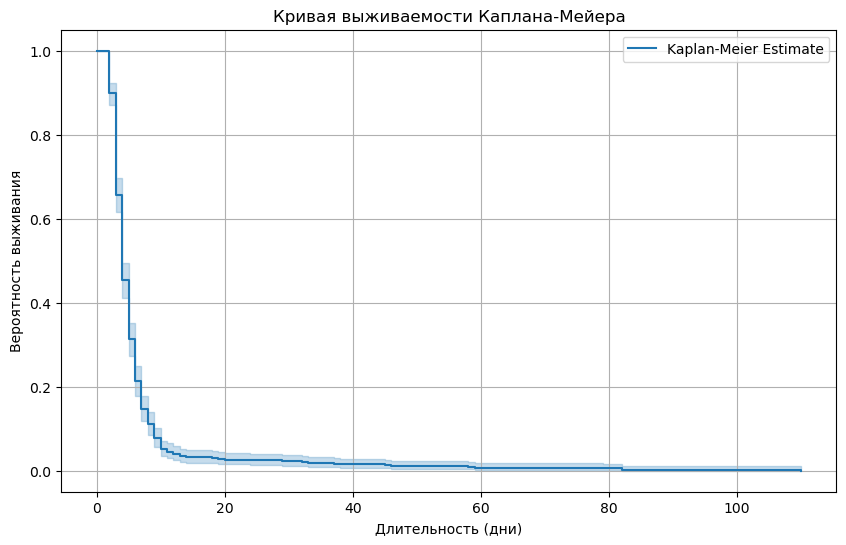

In [10]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.utils import median_survival_times

def kaplan_meier_analysis(input_csv_path, event_col='Поломка', duration_col='Длительность'):
    try:
        df = pd.read_csv(input_csv_path)


        # Инициализация объекта KaplanMeierFitter
        kmf = KaplanMeierFitter()

        # Подгонка модели Каплана-Мейера
        T = df[duration_col]  # Длительность (время до события или цензурирования)
        E = df[event_col]      # Событие (1=произошло, 0=цензурирование)

        kmf.fit(T, event_observed=E, label='Kaplan-Meier Estimate')

        #  Создание графика выживаемости
        plt.figure(figsize=(10, 6))  
        kmf.plot_survival_function()  
        plt.title('Кривая выживаемости Каплана-Мейера') 
        plt.xlabel('Длительность (дни)') 
        plt.ylabel('Вероятность выживания') 
        plt.grid(True)
        plt.show()  # Отображение графика

    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv_path}' не найден.")
    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Произошла непредвиденная ошибка: {e}")


input_csv_path = 'dano_out.csv' 

kaplan_meier_analysis(input_csv_path)


## Метод Нельсона-Аалена (или процесс Нельсона-Аалена)

**Кумулятивной функция риска**

Λ(t) = ∫ λ(u)du [0; 1]

**Оценка Нельсона-Аалена**

Λ**(t) = ∑ (dj/nj), где j: tj≤t

**Кумулятивный риск (Cumulative Hazard)** - это общее накопленное количество риска наступления определенного события (например, поломки оборудования, отказа детали) к определенному моменту времени. Он представляет собой сумму (или интеграл) мгновенных рисков, которые возникают в каждый момент времени до данного момента.

•  Мгновенный риск (Hazard Rate): Это вероятность наступления события в очень короткий промежуток времени, при условии, что событие еще не произошло к началу этого промежутка времени. Это как бы "сиюминутная" опасность.
•  Кумулятивный риск: Представьте, что вы складываете все эти "сиюминутные" опасности (мгновенные риски) на протяжении всего времени наблюдения. Сумма этих опасностей и есть кумулятивный риск. Он показывает, насколько велика вероятность того, что событие уже произошло к данному моменту времени, учитывая все риски, которые были до этого.

Кумулятивный риск - это не то же самое, что вероятность выживания (которая оценивается в анализе Каплана-Майера).

•  Вероятность выживания показывает вероятность того, что событие не произойдет к определенному моменту времени.
•  Кумулятивный риск показывает накопленную "опасность" наступления события к определенному моменту времени. Они связаны, но представляют разные перспективы.

Иначе говорят, метод Нельсона-Ааслена помогает оценить риск поломкм на разных временных периодах. 

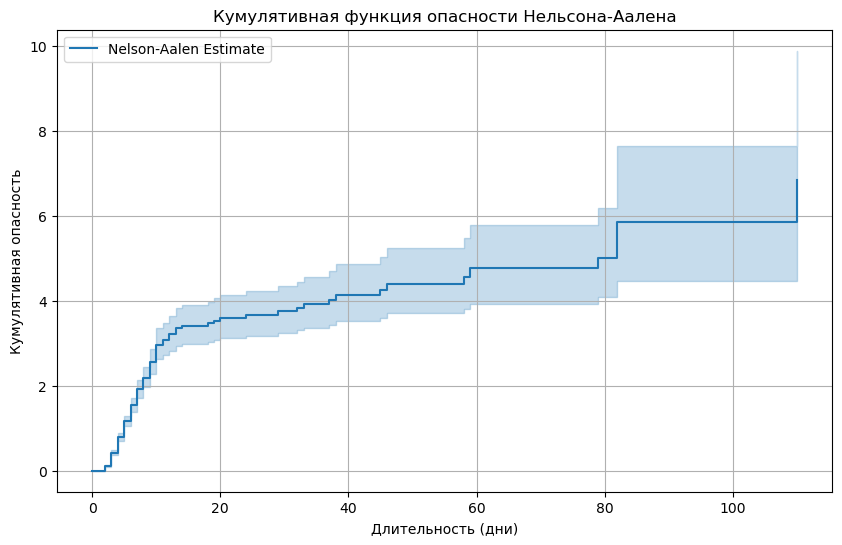

In [8]:
import pandas as pd
from lifelines import NelsonAalenFitter
import matplotlib.pyplot as plt


def nelson_aalen_analysis(input_csv_path, event_col='Поломка', duration_col='Длительность'):
    try:
        df = pd.read_csv(input_csv_path)

        if event_col not in df.columns:
            raise ValueError(f"Столбец '{event_col}' не найден в CSV-файле.")
        if duration_col not in df.columns:
            raise ValueError(f"Столбец '{duration_col}' не найден в CSV-файле.")

        naf = NelsonAalenFitter()

        # Подгонка модели Нельсона-Аалена
        T = df[duration_col]  # Длительность (время до события или цензурирования)
        E = df[event_col]      # Событие (1=произошло, 0=цензурирование)

        naf.fit(T, event_observed=E, label='Nelson-Aalen Estimate')

        #  Создание графика кумулятивной опасности
        plt.figure(figsize=(10, 6)) 
        naf.plot_cumulative_hazard()  # Построение кумулятивной опасности
        plt.title('Кумулятивная функция опасности Нельсона-Аалена') 
        plt.xlabel('Длительность (дни)') 
        plt.ylabel('Кумулятивная опасность')  
        plt.grid(True) 
        plt.show()  


    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv_path}' не найден.")
    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Произошла непредвиденная ошибка: {e}")


input_csv_path = 'dano_out.csv' 
nelson_aalen_analysis(input_csv_path)